#  **Task 1-Prediction using Supervised ML**

# **Predict the Percentage of an Student based on the number of study hours.**

**Linear Regression**

Linear regression is a Supervised Machine Learning Algorithm which attempts to model the relationship between two variables by fitting a linear equation to observed data.Linear regression is commonly used for predictive analysis and modeling. For example, it can be used to quantify the relative impacts of age, gender, and diet (the predictor variables) on height (the outcome variable).  Linear regression is also known as multiple regression, multivariate regression, ordinary least squares (OLS), and regression.  

**Importing Libraries**

In [19]:
#importing all libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn 
import seaborn as sns

## **Data Collection**

In [2]:
#Importing data from remote link
Dataset=pd.read_csv("http://bit.ly/w-data")
Dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## **Data Analysis**

In [3]:
Dataset.shape

(25, 2)

**Rows=25 , Columns=2**

In [4]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**No Null Values**

In [5]:
duplicate_values=Dataset.duplicated()
duplicate_values

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

**No Duplicate Values**

In [6]:
Dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# correlation is a statistical technique which determines how one variable is correlated with the  another variable.
Dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

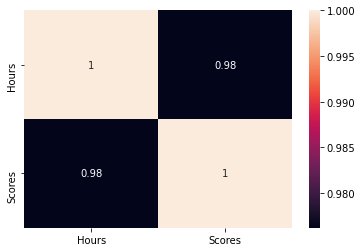

In [21]:
#Heat Map 
relation=Dataset.corr()
sns.heatmap(relation,annot=True)

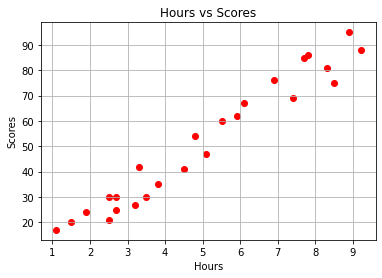

In [8]:
#Plotting the graph of given dataset
x=Dataset['Hours']
y=Dataset['Scores']
plt.scatter(x,y,color='red')
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid()
plt.show()

## **Data Modelling**

In [9]:
# Separating dataset of Hours and Scores in X1 and Y1.
X1=Dataset.iloc[:,:-1].values
Y1=Dataset.iloc[:,1].values


In [27]:
#Spliting the Data into training and testing sets by using train_test_split function.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.25,random_state=0)

In [28]:
#Training the model
from sklearn.linear_model import LinearRegression
mymodel=LinearRegression()
mymodel.fit(X_train,Y_train)

LinearRegression()

## **Prediction of Dataset**

In [29]:
# Predicting the test data
Y_pred=mymodel.predict(X_test)
print("Predicted Scores:",Y_pred)

Predicted Scores: [16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [31]:
# Comparing Actual and Predicted Data
df=pd.DataFrame({'Actual':Y_test,'Prediction':Y_pred})
df

,Actual,Prediction
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [32]:
# Coefficient of Regression Equation
mymodel.coef_

array([9.94167834])

In [33]:
# Intercept of Regresion Equation
mymodel.intercept_


1.9322042531516601

**What will be predicted score if a student studies for 9.25 hrs/days?**

In [34]:
y_pred=mymodel.predict([[9.25]])
print("No. of Hours:",(9.25))
print("Predicted Score:",y_pred)

No. of Hours: 9.25
Predicted Score: [93.89272889]


**Plotting of Regression line**

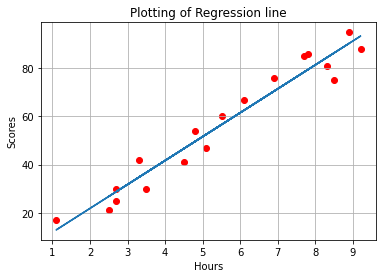

In [35]:
# Hours  -> Dependent Variable
# Scores -> Independent Variable
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,mymodel.predict(X_train))
plt.title("Plotting of Regression line")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid()
plt.show()

## **Evaluating the Model**

In [36]:
from sklearn import metrics
Error=metrics.mean_absolute_error(Y_test,Y_pred)
print("Mean Absolute Error:",Error)

Mean Absolute Error: 4.130879918502482
